In [1]:
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('retina')

In [3]:
!ls

Crime1.csv                            inclass.ipynb
crime classifcication | Kaggle.webloc test.ipynb


In [5]:
df = pd.read_csv('Crime1.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [11]:
# drop duplicate rows
df2 = df.drop_duplicates()

# convert Dates to datetime format
df2.Dates = pd.to_datetime(df2.Dates)

pandas_profiling.ProfileReport(df2)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Number of variables,10
Number of observations,833
Total Missing (%),0.0%
Total size in memory,65.2 KiB
Average record size in memory,80.1 B
Numeric,3
Categorical,6
Boolean,0
Date,1
Text (Unique),0
Rejected,0


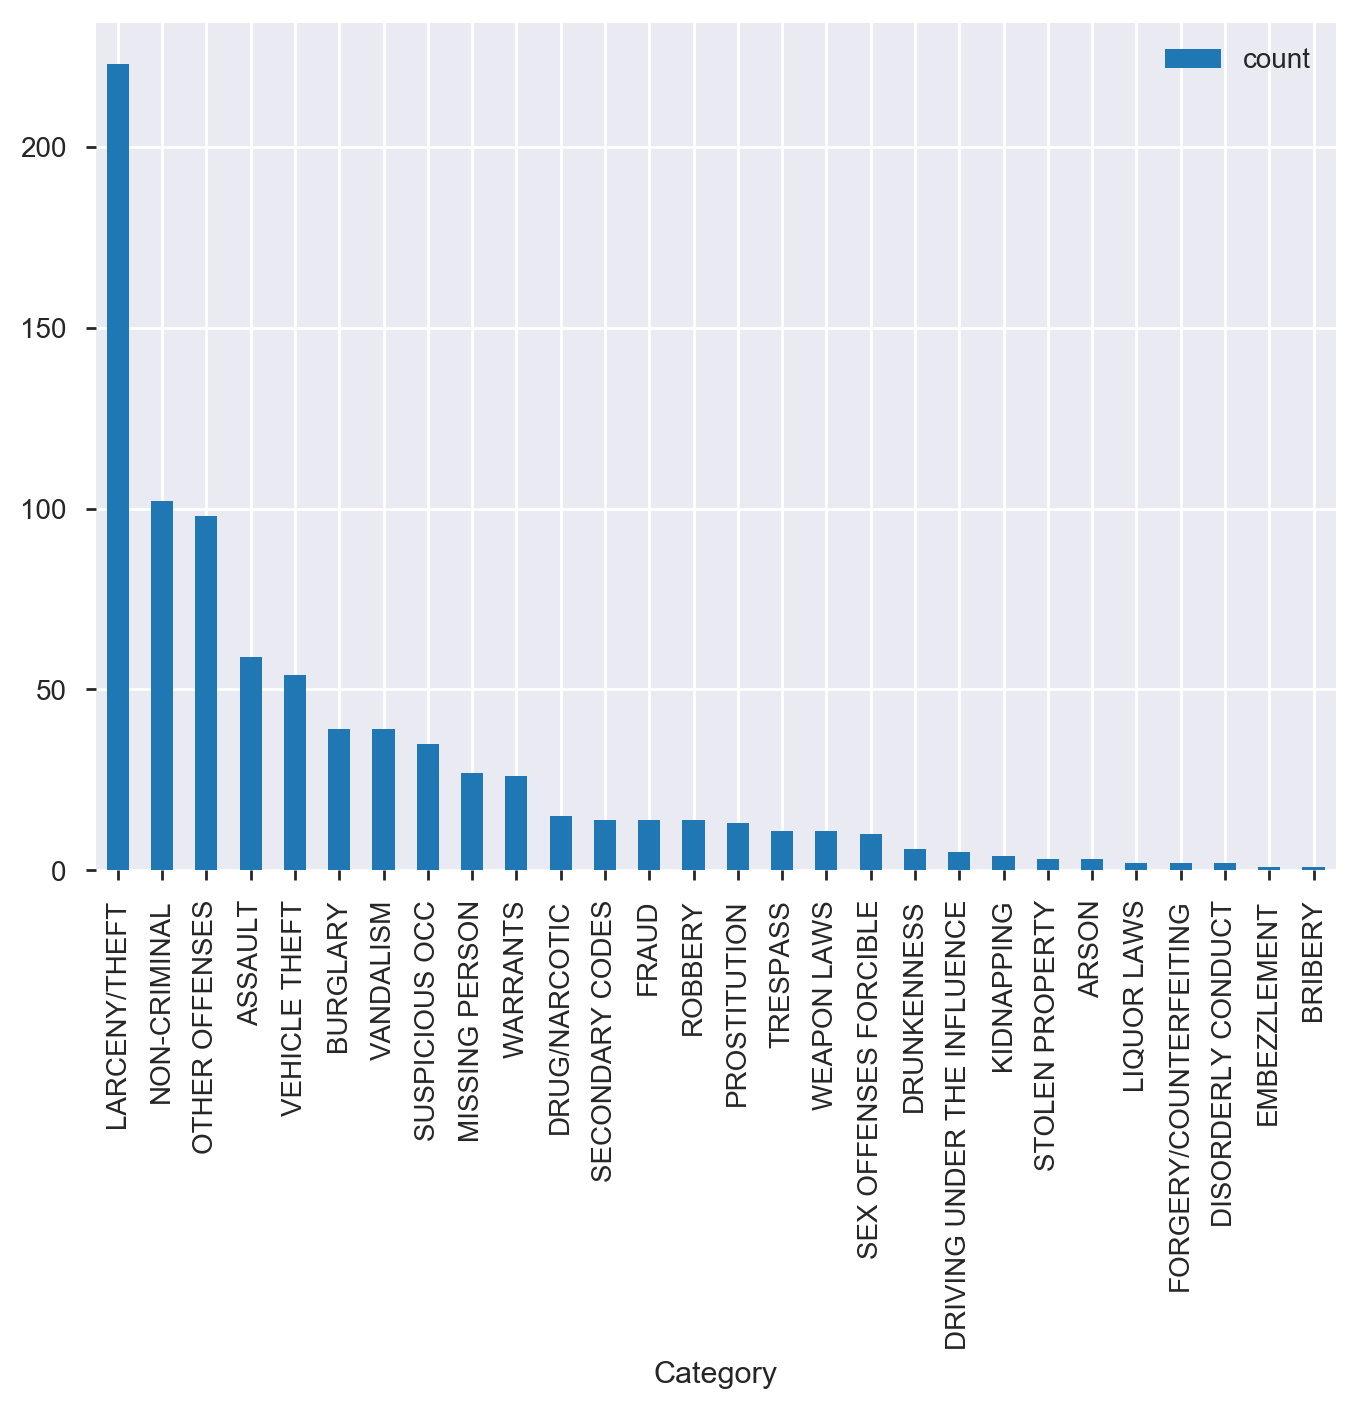

In [32]:
# bar chart for the column Category
# (Allows me to understand which types of crime happen more frenquently)
#df2.Category.plot(kind='bar')
df2.groupby('Category')\
    .size()\
    .to_frame()\
    .rename(columns={0:'count'})\
    .sort_values('count', ascending=False)\
    .plot.bar()

plt.show()

In [48]:
crimes = ['LARCENY/THEFT','VEHICLE THEFT','ASSAULT','ROBBERY','KIDNAPPING']

# filter dataframe to only show the crimes we want to analyse
df2 = df2[df2.Category.isin(crimes)]

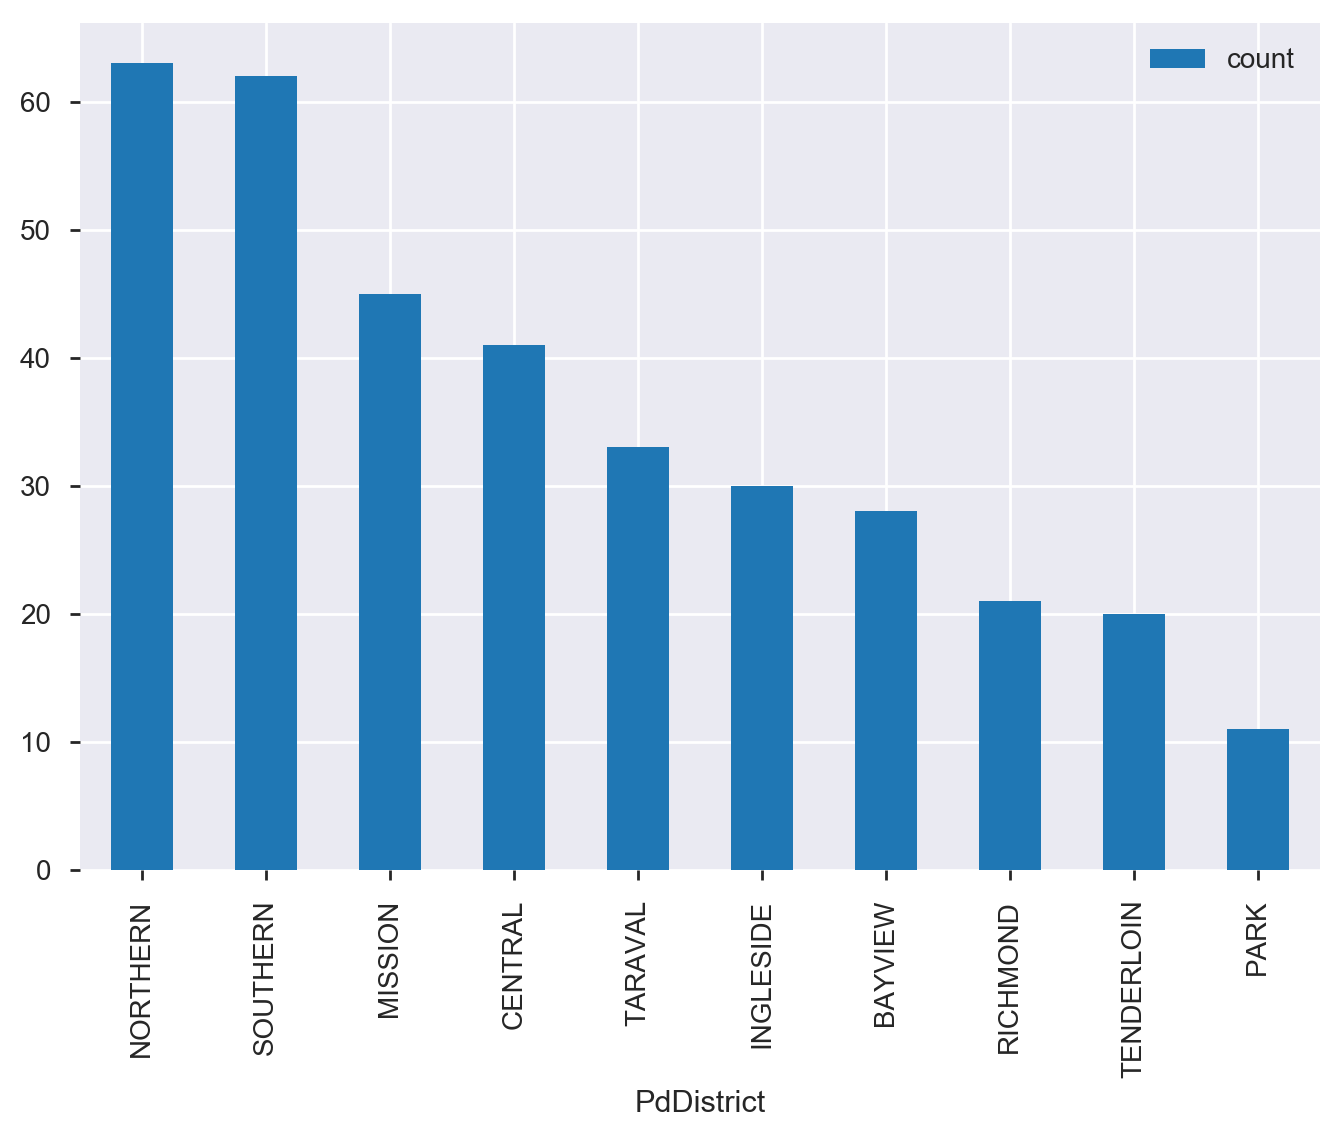

In [52]:
# bar chart with count of crimes per district
df2.groupby('PdDistrict')\
    .size()\
    .to_frame()\
    .rename(columns={0:'count'})\
    .sort_values('count', ascending=False)\
    .plot.bar()

plt.show()